# Extracting Data Through The Spotify API and Visualizing Tom Misch's Music Career
Tom Misch is personally on of my most favorite musical artists of all time and has solidified his signature guitar sound as he creates more and more music throughout the years. His music has maintained his passion and soul with each release but no two pieces of music are ever exactly the same. 

In this project, data on his music that is present on Spotify will be extracted through the Spotify API and will prepared for analysis in search of trends and differences in the behavior of Misch's music throughout the years. These trends will be visualized on a multi-line plot that will tell a story about how his music has evolved as he progresses through his musical career.

Here, we will start with importing the `spotipy` library that will allow for easier navigation through the Spotify API as well as other neccessary libraries for this project. Accessing the Spotify API will require obtaining a "Client ID" and "Client Secret" in order to authenticate into the API.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import time

In [2]:
# can aquire authentication after "creating an app" in Spotify developer account
client_id = "186c716e9c914bf98bcbecff429feb13"
client_secret = "effb840767fa4c28a5edf8c8ed7c0bbe"

# authenticate and connect to the Spotify API
manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = manager)

In [3]:
# can find artist id in the url of the artist's Spotify page
artist_id = "1uiEZYehlNivdK3iQyAbye"

track_id_list = []

# with artist id, get info on all of their albums
artist_albums = sp.artist_albums(artist_id)

# loop through each of the list objects in artist_albums['items'] and store album id into variable
# use album id to get info on the albums' tracks
for items in artist_albums['items']:
    album_id = items['id']
    album_tracks = sp.album_tracks(album_id)
    
    # loop through each of the list objects in album_tracks['items'] and store the track id into variable
    for items in album_tracks['items']:
        track_id = items['id']
        
        # append track ids into list
        track_id_list.append(track_id)
        
track_id_list[:10]

['2MyWUHhibF4sQ8dMvvRc7D',
 '5gigZaoOrF4j4f4vdVwwiv',
 '5oCcjzjtHvwIUm03gSf5GN',
 '3AVAi9De2LKPxqFmtLCBSO',
 '1uU9NrE72HNugIxrVkYaXL',
 '59jWgkNxaxiQEHoubz9O1C',
 '4oQ12nYRIDEVvuCZR8sHaa',
 '2KH17PL2j1zkGUQ0qA1DUP',
 '5FCKS7cX15Zz6UwmpqKqVR',
 '6Y4RJHIyTjAWP8i0AZrba0']

In [4]:
# explore the Spotify API to see which data is desirable
# choose to extract whatever is needed to include into final dataframe
track_info = sp.track(track_id_list[0])
track_info

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1uiEZYehlNivdK3iQyAbye'},
    'href': 'https://api.spotify.com/v1/artists/1uiEZYehlNivdK3iQyAbye',
    'id': '1uiEZYehlNivdK3iQyAbye',
    'name': 'Tom Misch',
    'type': 'artist',
    'uri': 'spotify:artist:1uiEZYehlNivdK3iQyAbye'}],
  'available_markets': ['JP'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/4uIyvLn4TJdpwE9Turx140'},
  'href': 'https://api.spotify.com/v1/albums/4uIyvLn4TJdpwE9Turx140',
  'id': '4uIyvLn4TJdpwE9Turx140',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b27384e1912294131198255e21ba',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e0284e1912294131198255e21ba',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d0000485184e1912294131198255e21ba',
    'width': 64}],
  'name': 'Quarantine Sessions',
  'release_date': '2021-09-03',
  'r

In [5]:
# choose to extract whatever is needed to include into final dataframe
audio_features = sp.audio_features(track_id_list[0])
audio_features[0]

{'danceability': 0.641,
 'energy': 0.373,
 'key': 11,
 'loudness': -16.408,
 'mode': 0,
 'speechiness': 0.0425,
 'acousticness': 0.905,
 'instrumentalness': 0.868,
 'liveness': 0.122,
 'valence': 0.326,
 'tempo': 108.068,
 'type': 'audio_features',
 'id': '2MyWUHhibF4sQ8dMvvRc7D',
 'uri': 'spotify:track:2MyWUHhibF4sQ8dMvvRc7D',
 'track_href': 'https://api.spotify.com/v1/tracks/2MyWUHhibF4sQ8dMvvRc7D',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2MyWUHhibF4sQ8dMvvRc7D',
 'duration_ms': 267525,
 'time_signature': 3}

In [6]:
# build function that extracts desired data, given a track id
def get_track_info(id):
    # insert the columns chosen beforehand
    track_info = sp.track(id)
    
    track_ids = track_info['id']
    track_name = track_info['name']
    duration_milliseconds = track_info['duration_ms']
    explicit = track_info['explicit']
    popularity = track_info['popularity']
    album_id = track_info['album']['id']
    album_name = track_info['album']['name']
    album_release_date = track_info['album']['release_date']
    track_number_in_album = track_info['track_number']
    total_tracks_in_album = track_info['album']['total_tracks']
    
    audio_features = sp.audio_features(id)
    
    danceability = audio_features[0]['danceability']
    energy = audio_features[0]['energy']
    key = audio_features[0]['key']
    loudness = audio_features[0]['loudness']
    mode = audio_features[0]['mode']
    speechiness = audio_features[0]['speechiness']
    acousticness = audio_features[0]['acousticness']
    instrumentalness = audio_features[0]['instrumentalness']
    liveness = audio_features[0]['liveness']
    valence = audio_features[0]['valence']
    tempo = audio_features[0]['tempo']
    time_signature = audio_features[0]['time_signature']
    
    # insert all the extracted data into a list
    track = [track_ids,track_name,duration_milliseconds,explicit,popularity,
             album_id,album_name,album_release_date,track_number_in_album,total_tracks_in_album,
             danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,
             liveness,valence,tempo,time_signature]
    
    return track

In [7]:
# check if the function works
get_track_info(track_id_list[0])

['2MyWUHhibF4sQ8dMvvRc7D',
 'Chain Reaction',
 267525,
 False,
 26,
 '4uIyvLn4TJdpwE9Turx140',
 'Quarantine Sessions',
 '2021-09-03',
 1,
 8,
 0.641,
 0.373,
 11,
 -16.408,
 0,
 0.0425,
 0.905,
 0.868,
 0.122,
 0.326,
 108.068,
 3]

In [8]:
tracks = []
# loop through each of the tracks' index number and apply into get_track_info function
for i in range(len(track_id_list)):
    time.sleep(0.5)
    track = get_track_info(track_id_list[i])
    
    # append data into list to insert into empty dataframe
    tracks.append(track)

In [9]:
# initiate an empty dataframe, define the columns, and insert data from the "track" variable
df = pd.DataFrame(tracks, columns = ['track_ids','track_name','duration_milliseconds','explicit',
                                     'popularity','album_id','album_name','album_release_date',
                                     'track_number_in_album','total_tracks_in_album',
                                     'danceability','energy','key','loudness','mode','speechiness','acousticness',
                                     'instrumentalness','liveness','valence','tempo','time_signature'])

# save to csv file
# df.to_csv("spotify_tom_misch.csv", sep=",")

# Cleaning and Exploring the Data
After extracting the data from the Spotify API, it must now be cleaned before any analytical action can be taken. Keep in mind that this project will only focus on on Misch's Spotify data, he has other songs released on other platforms that didn't make it onto Spotify but those will not be of concern here.

In [10]:
display(df.head())
print("\n")

display(df.shape)
display(df.info())
df.describe()

,track_ids,track_name,duration_milliseconds,explicit,popularity,album_id,album_name,album_release_date,track_number_in_album,total_tracks_in_album,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2MyWUHhibF4sQ8dMvvRc7D,Chain Reaction,267525,False,26,4uIyvLn4TJdpwE9Turx140,Quarantine Sessions,2021-09-03,1,8,...,11,-16.408,0,0.0425,0.905,0.868,0.1220,0.326,108.068,3
1,5gigZaoOrF4j4f4vdVwwiv,Cranes In The Sky,210077,False,27,4uIyvLn4TJdpwE9Turx140,Quarantine Sessions,2021-09-03,2,8,...,6,-12.056,1,0.0491,0.949,0.898,0.1990,0.349,67.785,5
2,5oCcjzjtHvwIUm03gSf5GN,For Carol (feat. Tobie Tripp),284900,False,25,4uIyvLn4TJdpwE9Turx140,Quarantine Sessions,2021-09-03,3,8,...,9,-12.335,1,0.0272,0.926,0.923,0.0927,0.240,101.987,4
3,3AVAi9De2LKPxqFmtLCBSO,Gypsy Woman,179211,False,27,4uIyvLn4TJdpwE9Turx140,Quarantine Sessions,2021-09-03,4,8,...,2,-10.662,0,0.0451,0.974,0.745,0.1080,0.504,117.992,4
4,1uU9NrE72HNugIxrVkYaXL,Parabéns (feat. Marcos Valle),248783,False,25,4uIyvLn4TJdpwE9Turx140,Quarantine Sessions,2021-09-03,5,8,...,7,-11.778,1,0.0795,0.866,0.762,0.1530,0.819,109.015,4


(123, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   track_ids              123 non-null    object 
 1   track_name             123 non-null    object 
 2   duration_milliseconds  123 non-null    int64  
 3   explicit               123 non-null    bool   
 4   popularity             123 non-null    int64  
 5   album_id               123 non-null    object 
 6   album_name             123 non-null    object 
 7   album_release_date     123 non-null    object 
 8   track_number_in_album  123 non-null    int64  
 9   total_tracks_in_album  123 non-null    int64  
 10  danceability           123 non-null    float64
 11  energy                 123 non-null    float64
 12  key                    123 non-null    int64  
 13  loudness               123 non-null    float64
 14  mode                   123 non-null    int64  
 15  speech

None

,duration_milliseconds,popularity,track_number_in_album,total_tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,211386.756098,37.268293,6.861789,12.723577,0.678504,0.441585,5.235772,-9.597488,0.585366,0.099294,0.428936,0.580148,0.141567,0.414958,111.724098,3.967480
std,72926.632384,15.294954,4.929545,5.687635,0.140835,0.158971,3.612549,2.538147,0.494674,0.080737,0.312687,0.382326,0.107737,0.230840,29.668354,0.311921
min,70300.000000,9.000000,1.000000,1.000000,0.302000,0.154000,0.000000,-16.599000,0.000000,0.025700,0.000374,0.000000,0.029000,0.043400,67.785000,3.000000
25%,148943.000000,24.000000,2.500000,8.000000,0.581000,0.299500,2.000000,-11.096000,0.000000,0.045150,0.189000,0.079950,0.089900,0.216000,91.041500,4.000000
50%,225203.000000,38.000000,6.000000,13.000000,0.695000,0.449000,5.000000,-9.084000,1.000000,0.074000,0.364000,0.812000,0.107000,0.364000,100.002000,4.000000
75%,267172.000000,49.000000,10.000000,19.000000,0.788000,0.560000,9.000000,-7.811000,1.000000,0.117000,0.697500,0.894500,0.153000,0.621000,118.018000,4.000000
max,429250.000000,69.000000,19.000000,19.000000,0.944000,0.793000,11.000000,-5.622000,1.000000,0.435000,0.992000,0.971000,0.973000,0.852000,187.063000,5.000000


# Dropping Duplicates
At first, there seems to be no duplicates, but when looking at the entire dataset in Excel, it appears that some albums repeat themselves; same `album_name` but different `album_id`. 

Can see that one version of an album has lower popularity values than the other. The lower population value can be explained by an initial version of the album being taken off from Spotify and replaced with the current version. Data about the removed old version of the album remained on the Spotify API. The less popular album duplicate will be dropped. Singles that already have an appearance on an album will also be dropped.

In [11]:
# initial scan shows no duplicates
df.duplicated().sum()

0

In [12]:
# find the aggregated sum of popularity, grouped by album_name and album_id
df2 = df.groupby(['album_name','album_id'])['popularity'].sum()
print(df2)
df.shape

album_name                                   album_id              
Beat Tape 1                                  2FVfODkF1inBzSwB2plsYk    699
                                             6wHutK9fqU7pmLkoNCr7zN    285
Beat Tape 2                                  5IW5ko3B1W5doRD3YH9DV8    606
Geography                                    28enuddLPEA914scE6Drvk    732
                                             2g49Kw03cpc5HQygEw450P    404
It Run's Through Me                          1XEPJSfxTS7MvnGLPNcnpb     10
Kyiv                                         3lsbLyfaGRdwKX3EROHyoV     37
Lift Off                                     3nOTv7wBRQ4bxeeIw47a6l     41
Losing My Way                                7KiHTorahtMj9enKWtg5lo     98
Lost In Paris                                0KWaGTiWoLcqnMROmwWF2v      9
Lost in Paris                                3OGqx2jmVKVkKOIOxGjOQC     47
Money                                        5qmEF78Uq9CjwIgvKQe7WG     59
My Fancy Free Future Love (Tom M

(123, 22)

In [13]:
# choose the album ids we want to remove (including singles that are already included in full albums)
dropped_id = ['6wHutK9fqU7pmLkoNCr7zN','2g49Kw03cpc5HQygEw450P','0KWaGTiWoLcqnMROmwWF2v',
              '4uIyvLn4TJdpwE9Turx140','7rnlxqdiSjjvceJLVMMmmv','1XEPJSfxTS7MvnGLPNcnpb',
              '3OGqx2jmVKVkKOIOxGjOQC','3lsbLyfaGRdwKX3EROHyoV','3nOTv7wBRQ4bxeeIw47a6l',
              '4u5C68CzGi223ErII6MD3l','2xNZKNIlHUY9NKXrHzr19g']

# filter out rows in dataframe if value in df_cleaned['album_id'] is in dropped_id
df_cleaned = df[df['album_id'].isin(dropped_id)==False].reset_index(drop=True)

# check again the groupby output
df2 = df_cleaned.groupby(['album_name','album_id'])['popularity'].sum()
print(df2)

df_cleaned.shape

album_name                                   album_id              
Beat Tape 1                                  2FVfODkF1inBzSwB2plsYk    699
Beat Tape 2                                  5IW5ko3B1W5doRD3YH9DV8    606
Geography                                    28enuddLPEA914scE6Drvk    732
Losing My Way                                7KiHTorahtMj9enKWtg5lo     98
Money                                        5qmEF78Uq9CjwIgvKQe7WG     59
My Fancy Free Future Love (Tom Misch Remix)  1nJJZh7fy1gS36zRDRbu4k     61
Quarantine Sessions                          0kx3vz4PkhozBIaWYmGQf8    401
What Kinda Music                             6iOCv7oGL5sGi2aVnRz2BI    598
What Kinda Music (Bonus Tracks)              5ciBtE0wpwlIew7zvUKmd2    150
Name: popularity, dtype: int64


(73, 22)

# Additional Cleaning
- Convert the values that are in milliseconds into something more intuitive, such as minutes.
- The `album_release_date` is observed to have an `object` dtype, will change dtype to `datetime`.

In [14]:
# convert milliseconds to seconds and adjust column name
df_cleaned.duration_milliseconds = round(df_cleaned.duration_milliseconds/60000, 2)
df_cleaned = df_cleaned.rename(columns={'duration_milliseconds': 'duration_minutes'})

# change the dtype of the album_release_date column to datetime
df_cleaned['album_release_date'] = pd.to_datetime(df_cleaned['album_release_date'])

# no need to clean "Quarantine Sessions" tracks, that is how they are actually publically displayed
df_cleaned.head()

,track_ids,track_name,duration_minutes,explicit,popularity,album_id,album_name,album_release_date,track_number_in_album,total_tracks_in_album,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5FCKS7cX15Zz6UwmpqKqVR,Chain Reaction - Quarantine Sessions,4.46,False,51,0kx3vz4PkhozBIaWYmGQf8,Quarantine Sessions,2021-09-03,1,8,...,11,-16.408,0,0.0425,0.905,0.868,0.1220,0.326,108.068,3
1,6Y4RJHIyTjAWP8i0AZrba0,Cranes in the Sky - Quarantine Sessions,3.50,False,52,0kx3vz4PkhozBIaWYmGQf8,Quarantine Sessions,2021-09-03,2,8,...,6,-12.056,1,0.0491,0.949,0.898,0.1990,0.349,67.785,5
2,0r4OAH6X87B4ZzTwEk05Ya,For Carol - Quarantine Sessions,4.75,False,49,0kx3vz4PkhozBIaWYmGQf8,Quarantine Sessions,2021-09-03,3,8,...,9,-12.335,1,0.0272,0.926,0.923,0.0927,0.240,101.987,4
3,1WULiiBUBuJa1Jt5lCsrzR,Gypsy Woman - Quarantine Sessions,2.99,False,54,0kx3vz4PkhozBIaWYmGQf8,Quarantine Sessions,2021-09-03,4,8,...,2,-10.662,0,0.0451,0.974,0.745,0.1080,0.504,117.992,4
4,342yTV6MKFqMfJRXznYa7o,Parabéns - Quarantine Sessions,4.15,False,49,0kx3vz4PkhozBIaWYmGQf8,Quarantine Sessions,2021-09-03,5,8,...,7,-11.778,1,0.0795,0.866,0.762,0.1530,0.819,109.015,4


# Analysis
Now that the data is cleaned up, here are some questions to ask for the analysis.
- Are there any obvious correlations between the columns?
- Which metrics should be given focus as most relevant for analyzing musical change over time?
- Are there outliers?
- How has the artist's music changed over time as he releases more music?

# Are there any obvious correlations between the columns?

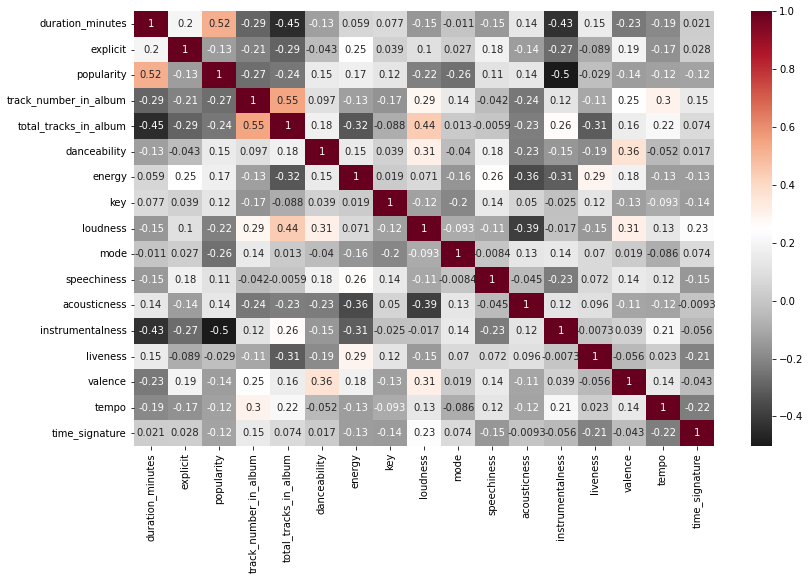

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# use a visual to explore the correlations between all columns
plt.figure(figsize=(13,8))
sns.heatmap(df_cleaned.corr(),annot=True,cmap='RdGy_r')
plt.show()

In [16]:
# unstacking turns the correlation matrix into a series object, sort by correlation coefficients
sorted_pairs = df_cleaned.corr().unstack().sort_values(ascending=False)

# show correlations only less than 1 and greater then or equal to 0.3
high_corr = sorted_pairs[sorted_pairs >= 0.3][sorted_pairs < 1]
high_corr

track_number_in_album  total_tracks_in_album    0.545040
total_tracks_in_album  track_number_in_album    0.545040
duration_minutes       popularity               0.520578
popularity             duration_minutes         0.520578
total_tracks_in_album  loudness                 0.438670
loudness               total_tracks_in_album    0.438670
valence                danceability             0.363082
danceability           valence                  0.363082
                       loudness                 0.313319
loudness               danceability             0.313319
                       valence                  0.312954
valence                loudness                 0.312954
track_number_in_album  tempo                    0.301167
tempo                  track_number_in_album    0.301167
dtype: float64

In [17]:
# show correlations only less than -0.3 and greater then or equal to -1
neg_corr = sorted_pairs[sorted_pairs >= -1][sorted_pairs < -0.3]
neg_corr

instrumentalness       energy                  -0.307867
energy                 instrumentalness        -0.307867
total_tracks_in_album  liveness                -0.308598
liveness               total_tracks_in_album   -0.308598
total_tracks_in_album  energy                  -0.324751
energy                 total_tracks_in_album   -0.324751
                       acousticness            -0.361231
acousticness           energy                  -0.361231
loudness               acousticness            -0.392855
acousticness           loudness                -0.392855
instrumentalness       duration_minutes        -0.430673
duration_minutes       instrumentalness        -0.430673
                       total_tracks_in_album   -0.447385
total_tracks_in_album  duration_minutes        -0.447385
popularity             instrumentalness        -0.502216
instrumentalness       popularity              -0.502216
dtype: float64

It only seems that only insight that is relevant to this analysis is that `popularity` and `instrumentalness` are negatively correlated. The less instrumental an album is, the higher its popularity. This can make sense as songs with singing and more featured artists tend to attract more listeners. This can be visually observed in the later visualizations of this project.

# Which metrics should be given focus as most relevant for analyzing musical change over time?
Here, I choose which metrics that I feel best illustrate musical evolution over time in a multi-line plot visualization and are as relevant to Tom Misch's style as possible.

In [18]:
df_cleaned.columns

Index(['track_ids', 'track_name', 'duration_minutes', 'explicit', 'popularity',
       'album_id', 'album_name', 'album_release_date', 'track_number_in_album',
       'total_tracks_in_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [19]:
# choosing only 5 metrics prevents the visual from being congested
columns = ['popularity','danceability','acousticness','instrumentalness','speechiness']

# Are there outliers?
Outliers tend to mess up statistical calculations and distort visualizations, so it is best to check for them now in the chosen columns before continuing.

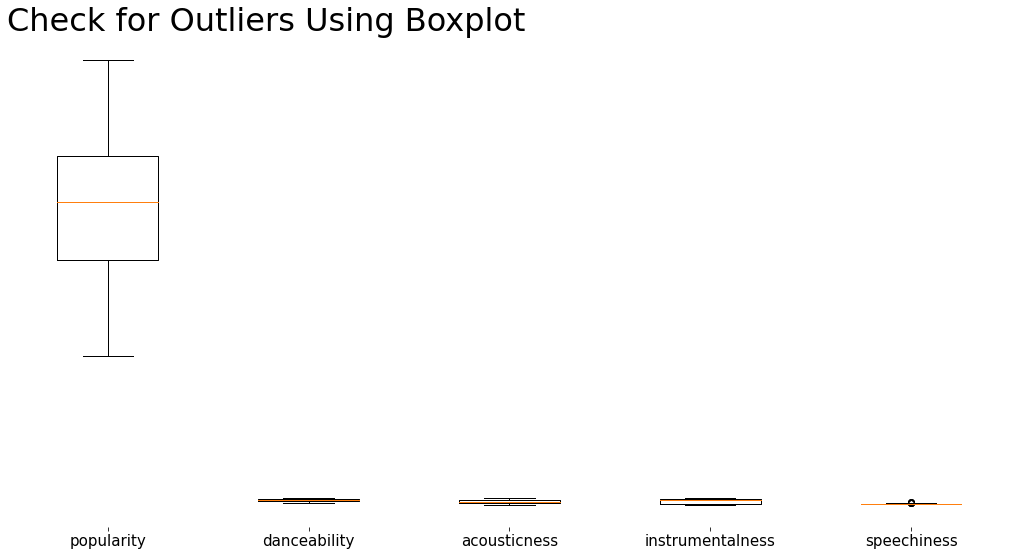

In [20]:
# check for outliers with boxplot
fig, ax = plt.subplots(figsize=(18,9))
sns.despine(left=True,bottom=True)
plt.title("Check for Outliers Using Boxplot",fontsize=32,loc='left')
ax.boxplot(df_cleaned[columns])
ax.set(yticklabels=[])  
ax.tick_params(left=False)
ax.set_xticklabels(columns,fontsize=15);

As we can see here, there are no outliers that would create any complications and it is safe to continue with the analysis.

Next is to find the aggregated average values for each album.

In [21]:
# aggregate data by grouping by album_release_date and album_name to get averages for each album
df_groupby = df_cleaned.groupby(['album_release_date','album_name'])[columns].mean().reset_index()
df_groupby

,album_release_date,album_name,popularity,danceability,acousticness,instrumentalness,speechiness
0,2014-03-14,Beat Tape 1,36.789474,0.709316,0.355392,0.865737,0.095679
1,2015-08-28,Beat Tape 2,50.500000,0.732000,0.389867,0.334880,0.105325
2,2018-04-06,Geography,56.307692,0.720231,0.417046,0.201117,0.137654
3,2019-06-18,Money,59.000000,0.774000,0.539000,0.069800,0.075800
4,2019-10-10,Losing My Way,49.000000,0.636000,0.699500,0.484000,0.136750
5,2020-01-10,My Fancy Free Future Love (Tom Misch Remix),30.500000,0.592000,0.301000,0.000378,0.214000
6,2020-04-24,What Kinda Music,49.833333,0.529250,0.255206,0.566750,0.082283
7,2020-10-02,What Kinda Music (Bonus Tracks),37.500000,0.641750,0.272700,0.810250,0.075025
8,2021-09-03,Quarantine Sessions,50.125000,0.620875,0.931625,0.859625,0.042250


# How do these metrics change and behave as Misch releases music over the timeline of his career?
It is not beneficial to use the discrete values of these metrics to observe their behavior over time. Instead, these average values will be converted into percentages so that percent change over time by album release date can be observed.

After converting to percentages, functions will be built to plot the percentages onto a multi-line plot to illustrate their delta, as well as adding subtext to provide context and background to each album release.

In [22]:
# initiate new dataframe that will contain the percentages
df_percent = pd.DataFrame(df_groupby[['album_release_date','album_name']])

for col in df_groupby.columns[2:]:
    df_percent[col] = df_groupby[col].div(df_groupby[col].sum()).multiply(100)

df_percent

,album_release_date,album_name,popularity,danceability,acousticness,instrumentalness,speechiness
0,2014-03-14,Beat Tape 1,8.768679,11.910421,8.540345,20.649480,9.917320
1,2015-08-28,Beat Tape 2,12.036548,12.291321,9.368785,7.987519,10.917154
2,2018-04-06,Geography,13.420797,12.093699,10.021928,4.797023,14.268105
3,2019-06-18,Money,14.062502,12.996561,12.952570,1.664864,7.856826
4,2019-10-10,Losing My Way,11.679027,10.679345,16.809504,11.544326,14.174420
5,2020-01-10,My Fancy Free Future Love (Tom Misch Remix),7.269598,9.940522,7.233253,0.009004,22.181542
6,2020-04-24,What Kinda Music,11.877650,8.886860,6.132793,13.518072,8.528837
7,2020-10-02,What Kinda Music (Bonus Tracks),8.938031,10.775895,6.553183,19.326013,7.776496
8,2021-09-03,Quarantine Sessions,11.947168,10.425374,22.387639,20.503701,4.379300


In [23]:
# function for lineplot that plots all the percentage columns against the album release date column
# index is for choosing up to which row should be plotted
def music_tracking(index,title,titlepad,xtickdistance):
    # set the plot and remove all spines
    fig, ax = plt.subplots(figsize=(13,10))
    sns.despine(left=True,bottom=True)
    
    # lineplot of percentage data with album release date column as x-axis
    # mark which lines corresponds to which columns
    for col in df_percent.columns[2:]:
        ax = sns.lineplot(x='album_release_date', y=col, data=df_percent.iloc[:index])
        plt.text(df_percent['album_release_date'][index-1],df_percent[col][index-1],col,fontsize=13,fontweight="ultralight")
        
        # make dotted lines that mark exactly when an album was released on the plot
        # mark each dotted line with the appropriate album name
        for i in range(len(df_percent.iloc[:index])):
            ax.axvline(x=df_percent['album_release_date'][i],dashes=(5,15), c='gainsboro')
            plt.text(df_percent['album_release_date'][i],xtickdistance,df_percent['album_name'][i],rotation=90,
                     verticalalignment='top',fontweight="ultralight",color='darkgrey')
    
    plt.title(title, fontsize=30,loc='left',pad=titlepad)
    plt.xlabel("Album Release Timeline",fontsize=20,loc='left',labelpad=9,color='grey')
    plt.ylabel("% Change",fontsize=20,loc='top',labelpad=9,color='grey')
    
# function for additional subtext under the title
# x and y are placeholders for the coordinates of the text on the plot
def subtitle(x,y,text):
    plt.text(x,y,text,fontsize=15,color='dimgrey',fontweight="light")

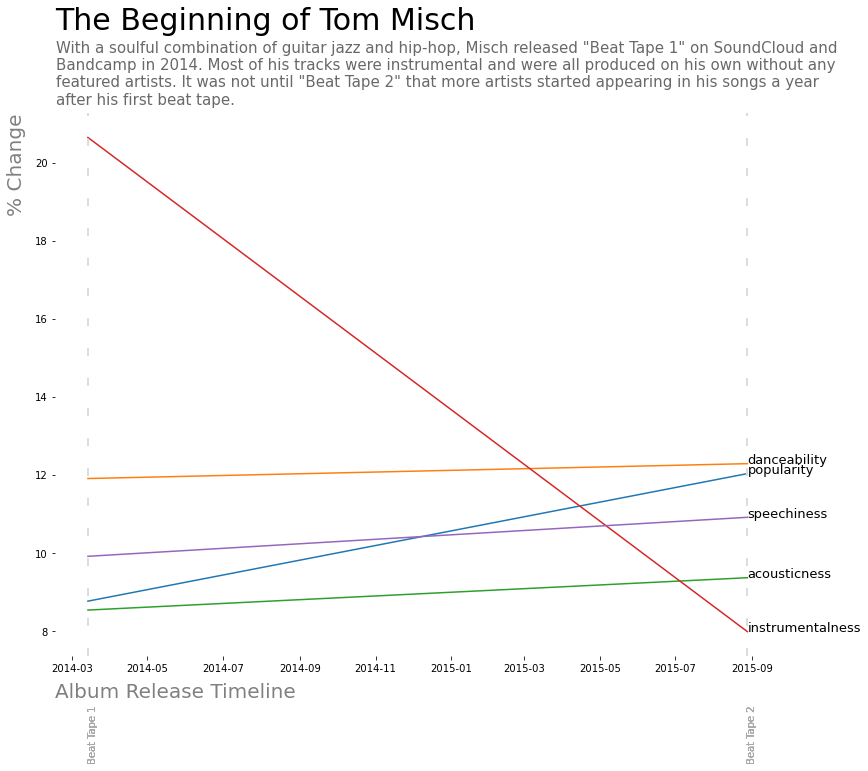

In [24]:
# start with plotting the 1st 2 albums
index = 2
title = "The Beginning of Tom Misch"
titlepad = 83
xtickdistance = 6.1

music_tracking(index,title,titlepad,xtickdistance)

x = 16117
y = 21.5
text = 'With a soulful combination of guitar jazz and hip-hop, Misch released "Beat Tape 1" on SoundCloud and\nBandcamp in 2014. Most of his tracks were instrumental and were all produced on his own without any\nfeatured artists. It was not until "Beat Tape 2" that more artists started appearing in his songs a year\nafter his first beat tape.'

subtitle(x,y,text)

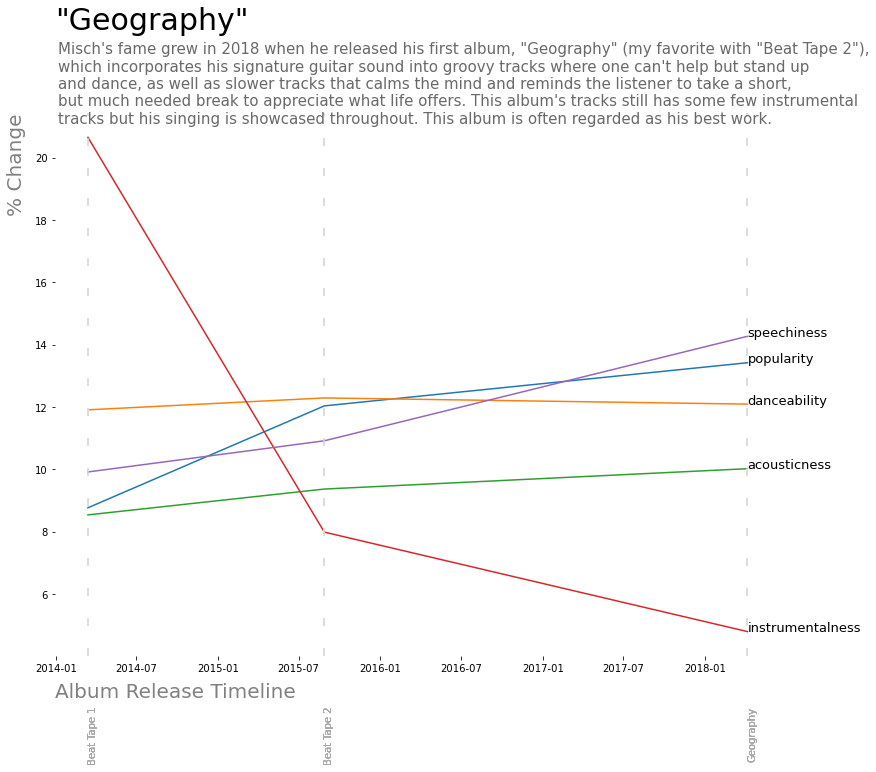

In [25]:
# moving onto "Geography"
index = 3
title = '"Geography"'
titlepad = 83
xtickdistance = 2.4

music_tracking(index,title,titlepad,xtickdistance)

x = 16075
y = 21.1
text = 'Misch\'s fame grew in 2018 when he released his first album, "Geography" (my favorite with "Beat Tape 2"),\nwhich incorporates his signature guitar sound into groovy tracks where one can\'t help but stand up\nand dance, as well as slower tracks that calms the mind and reminds the listener to take a short,\nbut much needed break to appreciate what life offers. This album\'s tracks still has some few instrumental\ntracks but his singing is showcased throughout. This album is often regarded as his best work.'

subtitle(x,y,text)

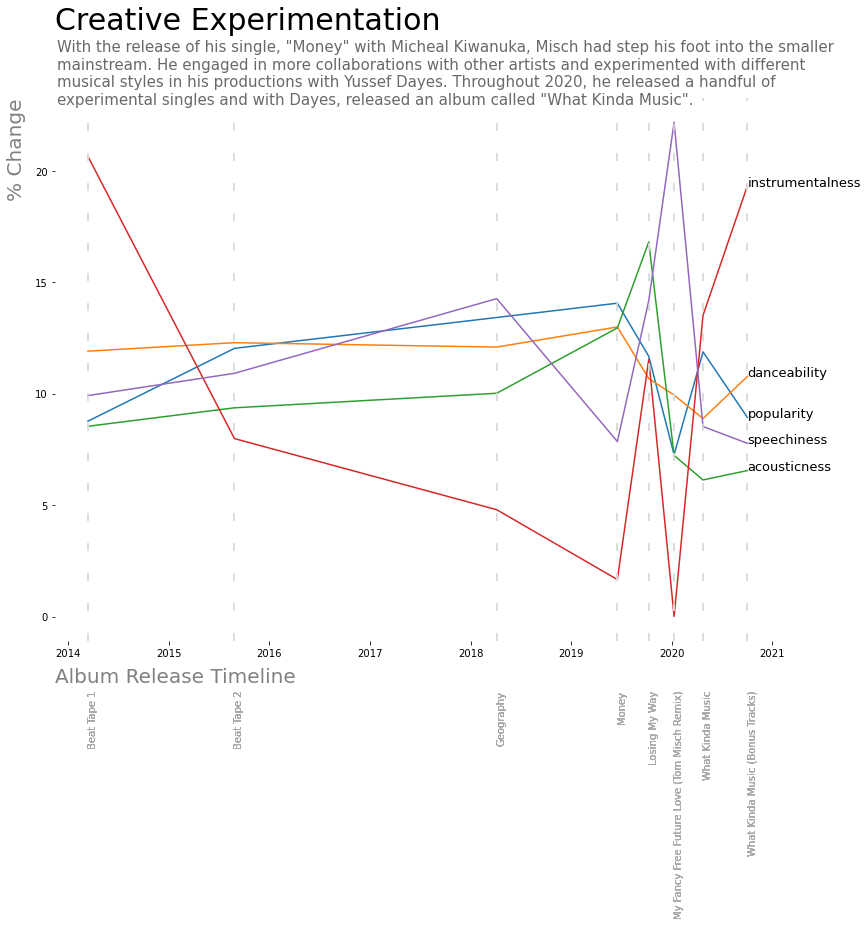

In [26]:
# plot albums "Money" to "What Kinda Music (Bonus Tracks)", show how this was an experimental phase for Misch
index = 8
title = "Creative Experimentation"
titlepad = 68
xtickdistance = -3.3

music_tracking(index,title,titlepad,xtickdistance)

x = 16032
y = 23
text = 'With the release of his single, "Money" with Micheal Kiwanuka, Misch had step his foot into the smaller\nmainstream. He engaged in more collaborations with other artists and experimented with different\nmusical styles in his productions with Yussef Dayes. Throughout 2020, he released a handful of\nexperimental singles and with Dayes, released an album called "What Kinda Music".'

subtitle(x,y,text)

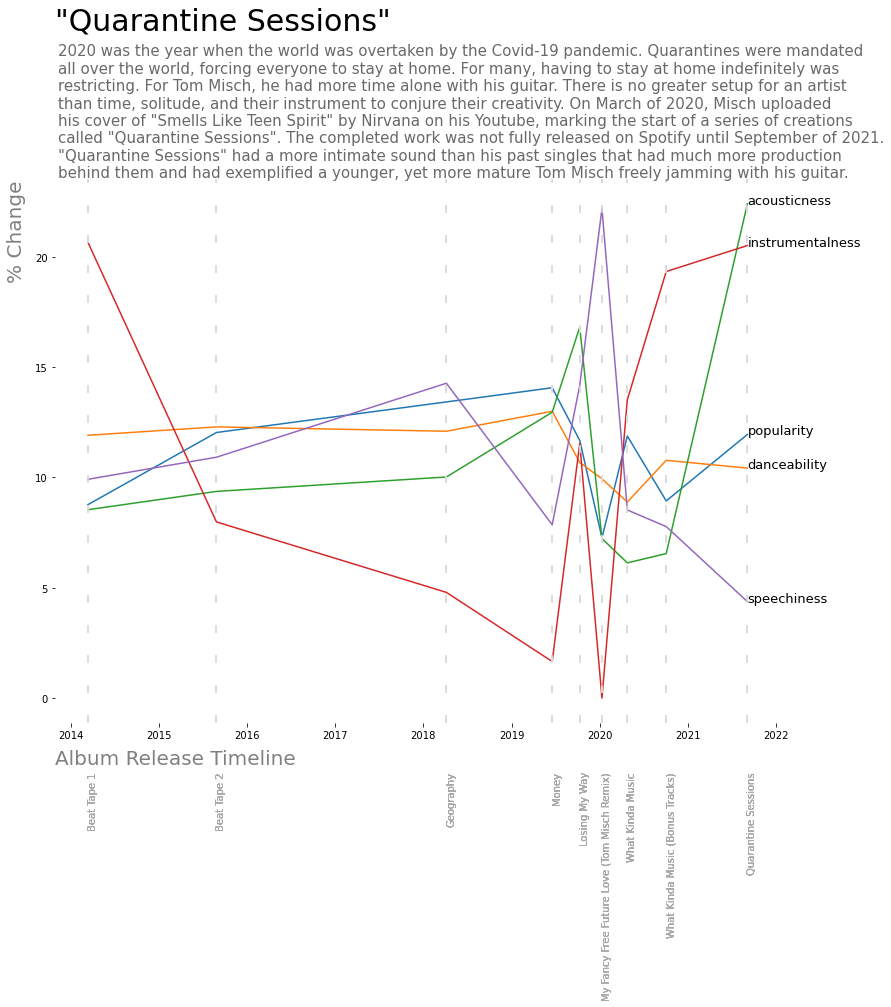

In [27]:
# finish with his most recent release, "Quarantine Sessions"
index = 9
title = '"Quarantine Sessions"'
titlepad = 150
xtickdistance = -3.3

music_tracking(index,title,titlepad,xtickdistance)

x = 16020
y = 23.6
text = '2020 was the year when the world was overtaken by the Covid-19 pandemic. Quarantines were mandated\nall over the world, forcing everyone to stay at home. For many, having to stay at home indefinitely was\nrestricting. For Tom Misch, he had more time alone with his guitar. There is no greater setup for an artist\nthan time, solitude, and their instrument to conjure their creativity. On March of 2020, Misch uploaded\nhis cover of "Smells Like Teen Spirit" by Nirvana on his Youtube, marking the start of a series of creations\ncalled "Quarantine Sessions". The completed work was not fully released on Spotify until September of 2021.\n"Quarantine Sessions" had a more intimate sound than his past singles that had much more production\nbehind them and had exemplified a younger, yet more mature Tom Misch freely jamming with his guitar.'

subtitle(x,y,text)

# Conclusion
In this project, we were able to obtain the information we wanted from the Spotify API and stored it into a pandas dataframe and csv file. We then were able to find less obvious parts to clean in the data and prepared it for various visualizations and analysis. What we ended up with is a visual that illustrates a story of how Misch's tracks have changed and how those changes affected their popularity from his first release up until his most recent one.

I have learned a lot through this project, especially learning how to create my own datasets through APIs and practicing how to better use visuals to tell a story about the data. This project was a lot of fun and I was able to better appreciate and learn more about one of my most favorite musical artists of all time.